In [1]:
import sys

In [2]:
sys.path.append("../../PythonScripts/")

In [3]:
from prereqs import *

now importing: 
1. numpy as np 
2. matplotlib.pyplot as plt
3. from scipy import stats






## General Metropolis-Hastings 

For a given target density *f* we wish to estimate, we build a Markov kernel *K* with stationary distribution *f* and then generate a Markov chain $X_t$ using this kernel so that the limiting distribution of the Markov chain is *f* and integrals can be approximated according to the *Ergodic Theorem*.

The **Metropolis-Hastings algorithm** is a general purpose MCMC method for approximating a target density *f*, using a conditional density $q(y | x)$ that is easy to simulate from. 

In addition, $q$ can be almost arbitrary in that the only theoretical requirements are that the ratio $\frac{f(y)}{q(y | x)}$ is known up to a constant *independent* of $x$ and that $q( \cdot | x )$ has enough dispertion to lead to an exploration of the entire support of *f*

We can rely on the feature of Metropolis-Hatings algorithm that for every given *q*, we can then construct a Metropolis-Hastings kernel such that *f* is its stationary distribution.


## General Metropolis-Hastings 

The Metropolis-Hastings algorithm as described Robert & Casella goes as follows

Given $x^{(t)}$

`1. Generate` $Y_t \sim q(y | x_t )$

`2. Take`
$$
X_{t+1} = 
  \begin{cases}
    Y_t       & \quad  \text{with probability }\ \rho(x^{(t)}, Y_t) \\
    x^{(t)}   & \quad  \text{with probability }\ 1 - \rho(x^{(t)}, Y_t) \\
  \end{cases}
$$
where 
$$
\displaystyle \rho(x^{(t)}, Y_t) = \text{min} \left\{ \frac{f(Y_t)}{f(x^{(t)})} \frac{q(x^{(t)} | Y_t)}{q(Y_t | x^{(t)})} , 1 \right\}
$$





## General Metropolis-Hastings 

In simpler terms, as we want to generate $X \sim f$, we first take an initial value $x^{(0)}$ (which can almost be any artibrary value in the support of $f$). 

1. We generate a value $Y_0 \sim q(y | x^{(0)})$. 
2. We calculate $\rho(x^{(t)}, Y_t)$
3. Generate a random value $U \sim Unif(0,1)$ 
4. If $U < \rho(x^{(t)}, Y_t)$, then we accept $X^{(1)} = Y_t$;
else we take $X^{(1)} = X^{(0)}$
5. Repeate steps 1-4 until you've satisfied the number of samples needed




## General Metropolis-Hastings 

You may notice the MH algorithm is not too dissimilar from the Accept-Reject algorithm.

`1. Generate` $Y \sim g$, $U \sim Unif(0,1)$

`2. Accept` $X = Y$ `if` $U \leq \frac{f(Y)}{M g(Y)}$ ;

`3. Return to step 1 otherwise`





## Example Beta(2.7, 6.3) 

As of now, we've covered multiple ways of generating random samples from a target density. Let us compare the accept-reject algorithm once more with the Metropolis-Hastings algorithm. Generate $N$ samples from $Beta(2.7, 6.3)$


In order to use the accept-reject algorithm, we need a candidate distribution to sample from. Below are a set of potential candidate distributions.



In [4]:
dbeta = stats.beta.pdf
dexp = stats.expon.pdf
dgamma = stats.gamma.pdf
dnorm = stats.norm.pdf

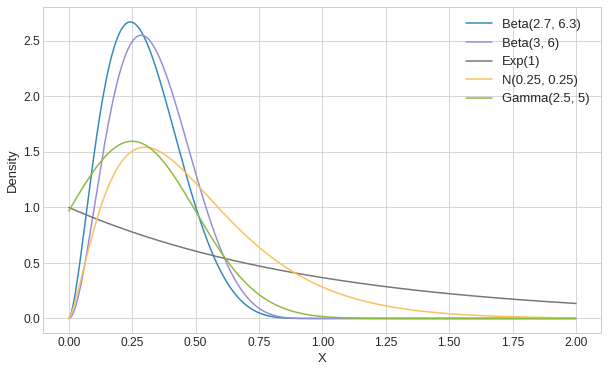

In [5]:
x = np.linspace(start=0, stop = 2, num=1000)
p1, = plot(x, dbeta(x=x, a = 2.7, b = 6.3), ylabel="Density", xlabel="X", color = 1, show=False)
p2, = plot(x, dbeta(x=x, a = 3, b = 6), ylabel="Density", xlabel="X", color = 2, show=False)
p3, = plot(x, dexp(x=x, scale = 1), ylabel="Density", xlabel="X", color = 3, show=False)
p4, = plot(x, dgamma(x=x, a = 2.5, scale = 1/5), ylabel="Density", xlabel="X", color = 4, show=False)
p5, = plot(x, dnorm(x = x, loc = 0.25, scale = 0.25), ylabel="Density", xlabel="X", color = 5, show=False)
plt.legend([p1, p2, p3, p4, p5], 
           ["Beta(2.7, 6.3)", "Beta(3, 6)", "Exp(1)", "N(0.25, 0.25)", "Gamma(2.5, 5)"], 
           fontsize= 13)
plt.show()

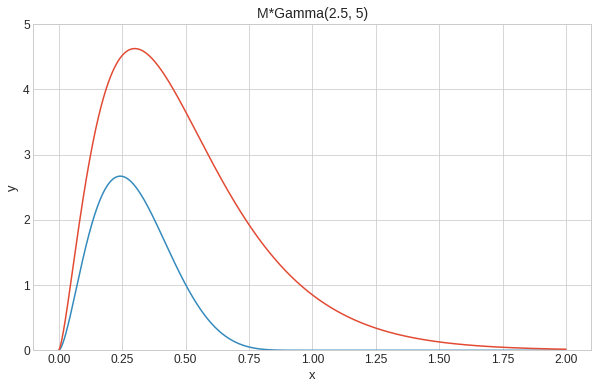

In [6]:
M = 3

plot(x, dbeta(x, a = 2.7, b= 6.3), show = False)
plot(x, M*dgamma(x, a = 2.5, scale = 1/5), title = "M*Gamma(2.5, 5)", color = 0, show=False, ylim=(0, 5))
plt.show()

We will use $Gamma(2.5, 1/5)$ as our candidate distribution, $g$.


In [7]:
N = 100000
## For accept-reject, we need to find a value for M

f = lambda x: dbeta(x, a = 2.7, b = 6.3)
g = lambda x: dgamma(x, a = 2.5, scale = 1/5)

rgamma = np.random.gamma
runif = np.random.rand

In [8]:
#?rgamma ## see this for help
import datetime as dt

In [9]:
start = dt.datetime.now()
X = []
#N = 200
i = 0
while(i < N):
    Y = rgamma(size = 1, shape = 2.5, scale = 1/5)
    U = runif(1)
    if(U*M <= f(Y)/g(Y)):
        i = i + 1
        X.append(Y)
end = dt.datetime.now()
duration = str(end - start)
print(f"Total time to run: {duration}")

Total time to run: 0:00:59.457001


In [10]:
q=[0, 25, 50, 75, 100]
qbeta = stats.beta.ppf ## do not use stats.beta.cdf
print(qbeta(q = [0.0, 0.25, 0.50, 0.75, 1.00], a = 2.7, b = 6.3))

#print(np.percentile(a=X, q=[0, 25, 50, 75, 100]))
summary(X)

## below are results from R:
##         0%        25%        50%        75%       100% 
## 0.00117328 0.18979491 0.28480053 0.39559864 0.94743365

[ 0.          0.18955714  0.28466078  0.39503332  1.        ]
 Min.: [ 0.0022]
 1st Qu.: [ 0.1897]
 Median: [ 0.2851]
 3rd Qu.: [ 0.3951]
 Max.: [ 0.8855]
 Mean: [ 0.3]


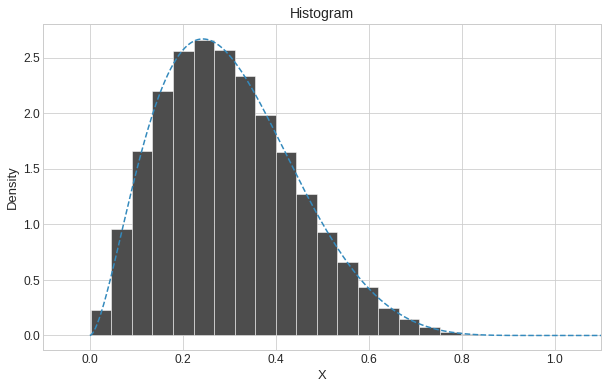

In [14]:
X = np.array(X)
plot(x, dbeta(x, a = 2.7, b= 6.3), show = False, linestyle="--", xlim = (-0.1, 1.1))
hist(X, bins = 20)
#plt.hist(X, bins = 20, normed=True)
#plt.show()

In [ ]:
np.percentile(a=  rgamma(size = 100000, shape = 2.5, scale = 1/5), q=[0, 25, 50, 75, 100])

## Example Beta(2.7, 6.3) 

Below is the Metropolis-Hastings implementation for this problem. 

In [46]:
from tqdm import tqdm ## for progress bar

N = 50000  # try 100 just to test
MH_X = np.zeros(shape=N)
MH_X[0] = 0.123456 ## initial value
for i in tqdm(range(1, N)):
    Y = rgamma(size = 1, shape = 2.5, scale = MH_X[i-1]) # can also use rexp(n = 1, rate = X[i])
    rho = (dbeta(x = Y, a = 2.7, b = 6.3) * dgamma(x = MH_X[i-1], a = 2.5, scale = Y) ) / ( dbeta(x = MH_X[i-1], a = 2.7, b = 6.3) * dgamma(x = Y, a = 2.5, scale = MH_X[i-1])  )  
    if(runif(1) < rho):
        MH_X[i] = Y
    else:
        MH_X[i] = MH_X[i-1]




100%|██████████| 49999/49999 [00:20<00:00, 2391.37it/s]


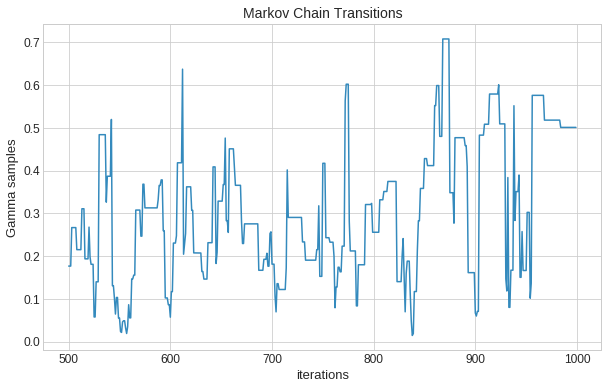

In [47]:
x1 = range(500, 1000)
plot(x1, MH_X[x1], title = "Markov Chain Transitions", ylabel = "Gamma samples", xlabel = "iterations")

In [48]:
print(qbeta(q = [0.0, 0.25, 0.50, 0.75, 1.00], a = 2.7, b = 6.3))

#print(np.percentile(a=X, q=[0, 25, 50, 75, 100]))
summary(MH_X)


[ 0.          0.18955714  0.28466078  0.39503332  1.        ]
 Min.: 0.0054
 1st Qu.: 0.1921
 Median: 0.2898
 3rd Qu.: 0.4011
 Max.: 0.8584
 Mean: 0.3


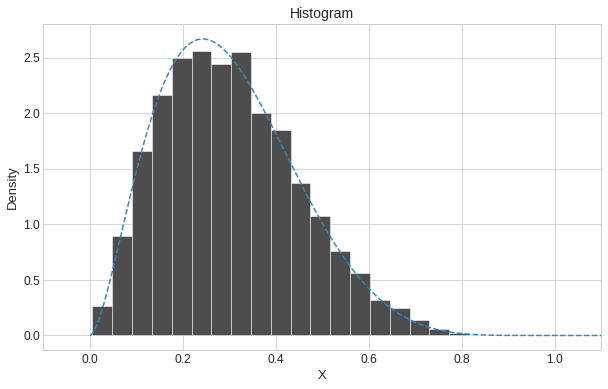

In [51]:
## see how samples from chain compare to Beta(2.7, 6.3) density
plot(x, dbeta(x, a = 2.7, b= 6.3), show = False, linestyle="--", xlim = (-0.1, 1.1))
hist(MH_X, bins = 20)
#plt.hist(X, bins = 20, normed=True)
#plt.show()


## Example Beta(2.7, 6.3) 

Here is a varition of the M-H algorithm used previously, except we do not let the candidate distribution depend on previous values of the chain. The candidate distribution depends only on present values of the chain, in effect $q(y | x) = q(y)$.


In [52]:
X = np.zeros(shape = N)

IndMH_X = np.zeros(shape=N)
IndMH_X[0] = 0.123456 ## random initial value
for i in tqdm(range(1, N)):
    Y = rgamma(size = 1, shape = 2.5, scale = 1/5) # no longer dependent on previous value
    rho = (dbeta(x = Y, a = 2.7, b = 6.3) * dgamma(x = IndMH_X[i-1], a = 2.5, scale = 1/5) ) / ( dbeta(x = IndMH_X[i-1], a = 2.7, b = 6.3) * dgamma(x = Y, a = 2.5, scale = 1/5)  )  
    if(runif(1) < rho):
        IndMH_X[i] = Y
    else:
        IndMH_X[i] = IndMH_X[i-1]

100%|██████████| 49999/49999 [00:21<00:00, 2341.51it/s]


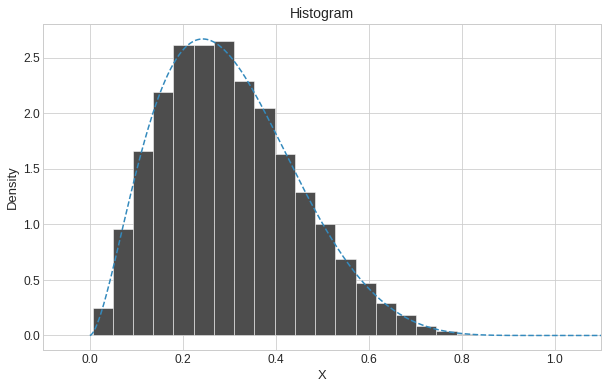

In [53]:
## see how samples from chain compare to Beta(2.7, 6.3) density
plot(x, dbeta(x, a = 2.7, b= 6.3), show = False, linestyle="--", xlim = (-0.1, 1.1))
hist(IndMH_X, bins = 20)
#plt.hist(X, bins = 20, normed=True)
#plt.show()


## Example Beta(2.7, 6.3) 

This version of the M-H algorithm is known as the **Independent Metropolis-Hastings**. This method appears a generalization of the accept-reject algorithm in the sense that the instrumental distribution is the same density $g$ as in the accept-reject algorithm. Thus, the proposed values $Y_i$ are the same, if not the accepted ones.






## Independent M-H 

The **Independent Metropolis-Hastings algorithm** as described Robert & Casella goes as follows

Given $x^{(t)}$

`1. Generate` $Y_t \sim g(y)$

`2. Take`

$$
X_{t+1} = 
  \begin{cases}
    Y_t       & \quad  \text{with probability }\ \rho(x^{(t)}, Y_t) \\
    x^{(t)}   & \quad  \text{with probability }\ 1 - \rho(x^{(t)}, Y_t) \\
  \end{cases}
$$
where 
$$
\displaystyle \rho(x^{(t)}, Y_t) = \text{min} \left\{ \frac{f(Y_t)}{f(x^{(t)})} \frac{g(x^{(t)})}{g(Y_t)}, 1 \right\}
$$




## Independent M-H 

In simpler terms, as we want to generate $X \sim f$, we first take an initial value $x^{(0)}$ (which can almost be any artibrary value in the support of $f$). 

1. We generate a value $Y_0 \sim q(y | x^{(0)})$. 
2. We calculate $\rho(x^{(t)}, Y_t)$
3. Generate a random value $U \sim Unif(0,1)$ 
4. If $U < \rho(x^{(t)}, Y_t)$, then we accept $X^{(1)} = Y_t$;
else we take $X^{(1)} = X^{(0)}$
5. Repeate steps 1-4 until you've satisfied the number of samples needed









## Example: Gamma(4.3, 6.2) 

Here we will compare again the Accept-Reject algorithm against the Metropolis-Hastings. Generate *N* random variables $X \sim Gamma(4.3, 6.2)$.

In [ ]:
## For accept-reject, we need to find a value for M
## we can use `optimize` to find the maximum of our target density
maximum  = optimize(f = function(x){ dgamma(x = x, shape = 4.3, rate = 6.2)}, 
                    interval = c(0, 2), maximum = TRUE ) ## obtain maximum

M = maximum$objective
curve(expr = dgamma(x = x, shape = 4.3, rate = 6.2), from = 0, 
      to = 2, col = "blue", main = "Gamma(4.3, 6.2)", xlab = "X", ylab = "Density")
abline(h = M, lty = 3, lwd = 2, col = "red")








```{r, fig.height=3, fig.width=5}
## For accept-reject, we need to find a value for M
## we can use `optimize` to find the maximum of our target density
maximum  = optimize(f = function(x){ dgamma(x = x, shape = 4.3, rate = 6.2)}, 
                    interval = c(0, 2), maximum = TRUE ) ## obtain maximum

M = maximum$objective
curve(expr = dgamma(x = x, shape = 4.3, rate = 6.2), from = 0, 
      to = 2, col = "blue", main = "Gamma(4.3, 6.2)", xlab = "X", ylab = "Density")
abline(h = M, lty = 3, lwd = 2, col = "red")
```



## Example: Gamma(4.3, 6.2) 

```{r}
f = function(x){
  dgamma(x = x, shape = 4.3, rate = 6.2)
}

g = function(x){
  dgamma(x = x, shape = 4, rate = 7)
}

X = numeric(N)
i = 0
while(i < N){
  Y = rgamma(n = 1, shape = 4, rate = 7)
  U = runif(1)
  if(U*M <= f(Y)/g(Y)){
    i = i + 1
    X[i] = Y
  }
}
```



## Example: Gamma(4.3, 6.2) 

```{r}

## see how samples from chain compare to Gamma density
hist(X, main = "Histogram of MCMC samples", prob = TRUE)
curve(expr = dgamma(x = x, shape = 4.3, rate = 6.2), 
      from = 0, to = 2, add = TRUE, col = "blue")

```



## Example: Gamma(4.3, 6.2) 

```{r}
## Metropolis Hastings 

N = 10000
X = numeric(N)
X[1] = rgamma(n = 1, shape = 4.3, rate = 6.2)
for(i in 1:N){
  Y = rgamma(n = 1, shape = 4, rate = 7)
  rho = (dgamma(x = Y, shape = 4.3, rate = 6.2) * dgamma(x = X[i], shape = 4, rate = 7)) / 
    (dgamma(x = X[i], shape = 4.3, rate = 6.2) * dgamma(x = Y, shape = 4, rate = 7)) 
  #X[i+1] = X[i] + (Y - X[i])*(runif(1) < rho) ## equivalent to if-else statement below
  if(runif(1) < rho){
    X[i+1] = Y
  } else{
    X[i+1] = X[i]
  }
}
#qgamma(p = c(0, 0.25, 0.5, 0.75, 1), shape = 4.3, rate = 6.2) #[1] 0.0000000 0.4488888 0.6405895 0.8808118       Inf
quantile(X)  ## rgamma: 0.6979356

```



## Example: Gamma(4.3, 6.2) 

```{r, fig.height=3.5}
## see chain transitions
par(mfrow = c(1,2))
plot(X, type = "o", main = "MCMC samples",
     xlim = c(1,200),
     xlab = "iterations", ylab = "X (samples obtained)")

plot(X, type = "o", main = "MCMC samples",
     xlim = c(N-200,N),
     xlab = "iterations", ylab = "X (samples obtained)")
```



## Example: Gamma(4.3, 6.2) 

```{r, fig.height=3.5}
## see how samples from chain compare to Gamma density
hist(X, main = "Histogram of MCMC samples", prob = TRUE)
curve(expr = dgamma(x = x, shape = 4.3, rate = 6.2), 
      from = 0, to = 2, add = TRUE, col = "blue")

```


## Example: Gamma(4.3, 6.2) 



```{r, echo=FALSE, fig.height=4, fig.align='center'}
## potential instumential distributions
par(pin = c(4.5,3.2))
curve(expr = dgamma(x, shape = 4.3, 6.2), from = 0, to = 2, xlab = "x", ylab = "density", ylim = c(0, 1.5))
curve(expr = df(x, 4, 6), from = 0, to = 2, add = TRUE, col = 2, lty = 2)
curve(expr = dexp(x, rate = 1), from = 0, to = 2, add = TRUE, col = 3, lty = 2)
curve(expr = dgamma(x, shape = 2.5, rate = 5), from = 0, to = 2, add = TRUE, col = 6, lty = 2)
legend(x = 1.2, y = 1.5, legend = c("Gamma(4.3, 6.2)", "F(4, 6)", "Exp(1)", "N(0.25, 0.25)", "Gamma(2.5, 5)"), 
       lty = c(1, 2, 2, 2, 2), col = c(1:4, 6), merge = TRUE)
```


## Example: Gamma(4.3, 6.2) 

```{r}
## Metropolis Hastings
X = numeric(N)
X[1] = 0.5
for(i in 1:N){
  Y = rf(n = 1, df1 = 4, df2 = 6)
  rho = (dgamma(x = Y, shape = 4.3, rate = 6.2) * df(x = X[i], df1 = 4, df2 = 6)) / 
    (dgamma(x = X[i], shape = 4.3, rate = 6.2) * df(x = Y, df1 = 4, df2 = 6)) 
  #X[i+1] = X[i] + (Y - X[i])*(runif(1) < rho) ## equivalent to if-else statement below
  if(runif(1) < rho){
    X[i+1] = Y
  } else{
    X[i+1] = X[i]
  }
}
qgamma(p = c(0, 0.25, 0.5, 0.75, 0.9), shape = 4.3, rate = 6.2)
quantile(X, probs = c(0, 0.25, 0.5, 0.75, 0.9))
```


## Example: Gamma(4.3, 6.2) 

```{r, fig.height=3.5}
## see chain transitions
plot(X, type = "o", main = "MCMC samples", xlim = c(500,1000), 
     xlab = "iterations", ylab = "X (samples obtained)")


```



## Example: Gamma(4.3, 6.2) 


```{r, fig.height=3.5}
## see how samples from chain compare to Gamma density
hist(X, main = "Histogram of MCMC samples", prob = TRUE)
curve(expr = dgamma(x = x, shape = 4.3, rate = 6.2), from = 0, to = 2, add = TRUE, col = "blue")

```








